In [3]:
# Logistic Regression Cell #

## 1st step | Load dataset and anaysis ##

import sklearn.datasets as ds
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.linear_model import LogisticRegression
import pandas as pd
from sklearn.metrics import precision_score, recall_score, confusion_matrix, roc_curve, precision_recall_curve, accuracy_score
from sklearn.model_selection import GridSearchCV

## Setup Citrus csv file to be read via panda module ##
citrus_ds = pd.read_csv('C:/Users/Owner/OneDrive/citrus.csv')
print(citrus_ds)

## Uploads Citrus csv file to numpy array for usage with algorithms ##

name = citrus_ds['name'].to_numpy()

# #creates y ##
y = np.zeros(len(name))
y[name == "grapefruit"] = 1

# create X

X = np.array([citrus_ds['diameter'].to_numpy(), citrus_ds['weight'].to_numpy(), citrus_ds['red'].to_numpy(),
             citrus_ds['green'].to_numpy(), citrus_ds['blue'].to_numpy()])

X = np.transpose(X)

## Splits Training and Test sets of data ##
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

## Fruit Class Lables ##
## Oranges = [1], Grapefruits = [0] ##

# The total number of samples

print(len(X))
print(X.shape[0])

## Number of Oranges ##

print("Oranges:", len(X[y == 1]))
print("Oranges:", X[y == 1].shape[0])

# Number of GrapeFruits ##

print("Grapefruits:", len(X[y == 0]))
print("Grapefruits:", X[y == 0].shape[0])

## Print out the training and test sets ##

print('training set', X_train.shape)
print('test set', X_test.shape)

## Creation and training of Regression Model ##

logitR = LogisticRegression(C = 1, penalty = 'l1', solver = 'saga', random_state = 0, max_iter=10000)
logitR.fit(X_train, y_train)


## Evaluation to predict class labels  ##

logitR.predict(X_train[:5])

## True classes ##

y_train[0:5]

## Probability output ##

logitR.predict_proba(X_train[:5])


## Model Performance ##

acc_train = logitR.score(X_train, y_train)
acc_test = logitR.score(X_test, y_test)
print('training acc:', acc_train, 'test acc:', acc_test)

# Calculate precision and Accuracy using the cfm(Confusion Matrix) ##
y_test_pred = logitR.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)

## Recall rate for Oranges ##

print("recall", cm[0][0]/cm[0][0] + cm[0][1])

# Recall rate for GrapeFruits ##


print("precision", cm[0][0]/cm[0][0] + cm[1][0])

## Parameter searching using GridSearchCV ##

rs = 0
logitR = LogisticRegression(solver="liblinear",random_state=0, max_iter=10000)

param_grid = {
            'penalty' : ['l2','l1'],  
            'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(estimator=logitR, cv=3, param_grid=param_grid , scoring='accuracy', verbose=3)
clf.fit(X_train, y_train)
y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
print(cm)



            name  diameter  weight  red  green  blue
0         orange      2.96   86.76  172     85     2
1         orange      3.91   88.05  166     78     3
2         orange      4.42   95.17  156     81     2
3         orange      4.47   95.60  163     81     4
4         orange      4.48   95.76  161     72     9
...          ...       ...     ...  ...    ...   ...
9995  grapefruit     15.35  253.89  149     77    20
9996  grapefruit     15.41  254.67  148     68     7
9997  grapefruit     15.59  256.50  168     82    20
9998  grapefruit     15.92  260.14  142     72    11
9999  grapefruit     16.45  261.51  152     74     2

[10000 rows x 6 columns]
10000
10000
Oranges: 5000
Oranges: 5000
Grapefruits: 5000
Grapefruits: 5000
training set (8000, 5)
test set (2000, 5)
training acc: 0.940125 test acc: 0.9345
[[920  68]
 [ 63 949]]
recall 69.0
precision 64.0
Fitting 3 folds for each of 14 candidates, totalling 42 fits
[CV 1/3] END ...............C=0.001, penalty=l2;, score=0.933 total t

In [4]:
## Evaluation metrics ##

## Test Accuracy ##
acc_test = clf.score(X_test, y_test)
print(acc_test) 
y_test_pred = clf.predict(X_test)

## Confusion Matrix ##

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

## Precision Rate ##
print("precision", cm[0][0]/(cm[0][0] + cm[1][0]))

#Recall Rate ##
print("recall", cm[0][0]/(cm[0][0] + cm[0][1]))



0.9625
[[938  50]
 [ 25 987]]
precision 0.9740394600207685
recall 0.9493927125506073


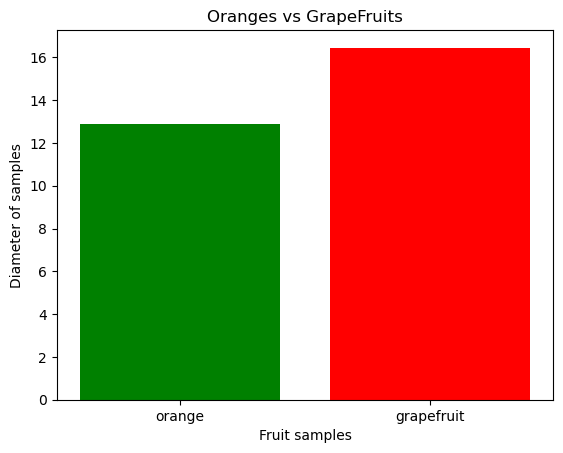

In [5]:
## Barchart Visualization for Feature 1 (diameter) ##

import matplotlib.pyplot as plt
import pandas as pd

## Read CSV file(Citrus)
data = pd.read_csv('C:/Users/Owner/OneDrive/citrus.csv')

## Dataframe for CSV File ##
df = pd.DataFrame(data)


## Array variables(X-axis & Y-Axis)
name = np.array(df.iloc[: ,0])
X = np.array(df.iloc[: ,1])
X_orange = X[name == "orange"]
X_grape = X[name == "grapefruit"]

name_orange = name[name == "orange"]
name_grape = name[name == "grapefruit"]



plt.bar(name_orange, X_orange, color='g')
plt.bar(name_grape, X_grape, color='r')
plt.title("Oranges vs GrapeFruits")
plt.xlabel("Fruit samples")
plt.ylabel("Diameter of samples")
  
# Show the plot
plt.show()


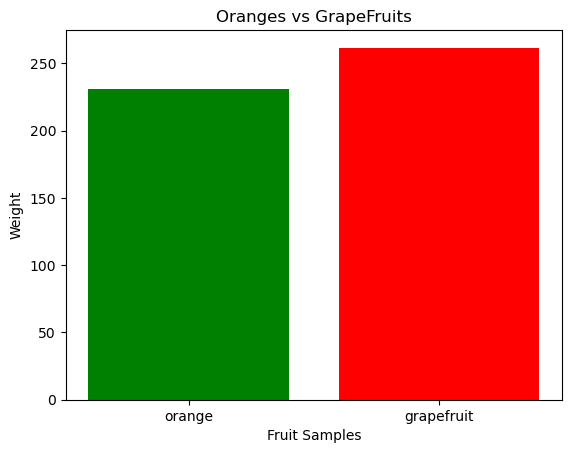

In [6]:
## BarChart Visualization for Feature 2(Weight) ##

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:/Users/Owner/OneDrive/citrus.csv')


df = pd.DataFrame(data)



name = np.array(df.iloc[: ,0])
X = np.array(df.iloc[: ,2])
X_orange = X[name == "orange"]
X_grape = X[name == "grapefruit"]

name_orange = name[name == "orange"]
name_grape = name[name == "grapefruit"]



plt.bar(name_orange, X_orange, color='g')
plt.bar(name_grape, X_grape, color='r')
plt.title("Oranges vs GrapeFruits")
plt.xlabel("Fruit Samples")
plt.ylabel("Weight")
  
# Show the plot
plt.show()


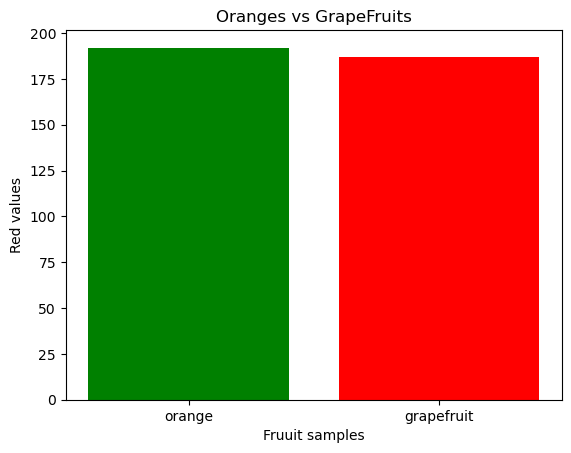

In [7]:
## BarChart Visualization for Feature 3(Red) ##

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:/Users/Owner/OneDrive/citrus.csv')


df = pd.DataFrame(data)



name = np.array(df.iloc[: ,0])
X = np.array(df.iloc[: ,3])
X_orange = X[name == "orange"]
X_grape = X[name == "grapefruit"]

name_orange = name[name == "orange"]
name_grape = name[name == "grapefruit"]



plt.bar(name_orange, X_orange, color='g')
plt.bar(name_grape, X_grape, color='r')
plt.title("Oranges vs GrapeFruits")
plt.xlabel("Fruuit samples")
plt.ylabel("Red values")
  
# Show the plot
plt.show()


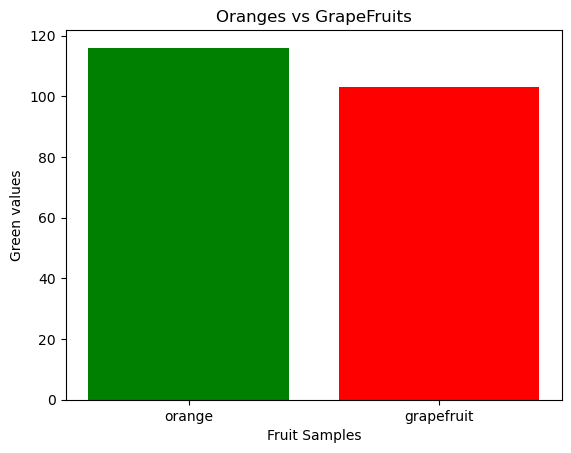

In [8]:
## BarChart Visualization for Feature 4(Green) ##

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:/Users/Owner/OneDrive/citrus.csv')


df = pd.DataFrame(data)



name = np.array(df.iloc[: ,0])
X = np.array(df.iloc[: ,4])
X_orange = X[name == "orange"]
X_grape = X[name == "grapefruit"]

name_orange = name[name == "orange"]
name_grape = name[name == "grapefruit"]



plt.bar(name_orange, X_orange, color='g')
plt.bar(name_grape, X_grape, color='r')
plt.title("Oranges vs GrapeFruits")
plt.xlabel("Fruit Samples")
plt.ylabel("Green values")
  
# Show the plot
plt.show()


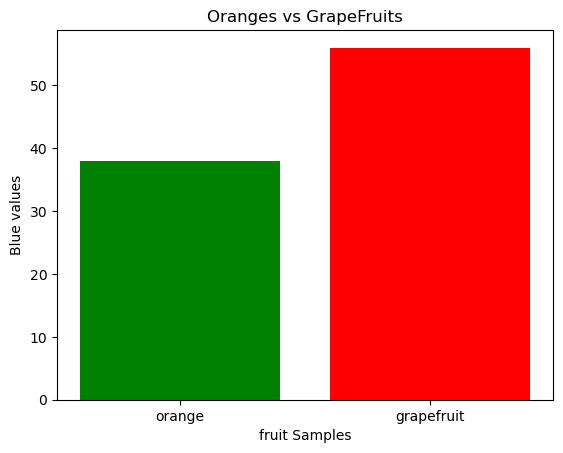

In [9]:
## BarChart Visualization for Feature 5(Blue) ##

import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('C:/Users/Owner/OneDrive/citrus.csv')


df = pd.DataFrame(data)



name = np.array(df.iloc[: ,0])
X = np.array(df.iloc[: ,5])
X_orange = X[name == "orange"]
X_grape = X[name == "grapefruit"]

name_orange = name[name == "orange"]
name_grape = name[name == "grapefruit"]



plt.bar(name_orange, X_orange, color='g')
plt.bar(name_grape, X_grape, color='r')
plt.title("Oranges vs GrapeFruits")
plt.xlabel("fruit Samples")
plt.ylabel("Blue values")
  
# Show the plot
plt.show()


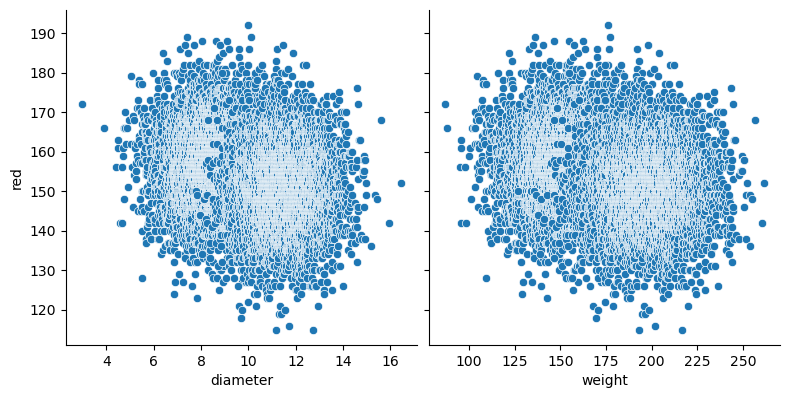

In [12]:
## Pairplot visualization for Feature Column Red ##

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(citrus_ds, x_vars =['diameter', 'weight', ],
             y_vars = 'red', size = 4, aspect = 1, kind ='scatter')
plt.show()

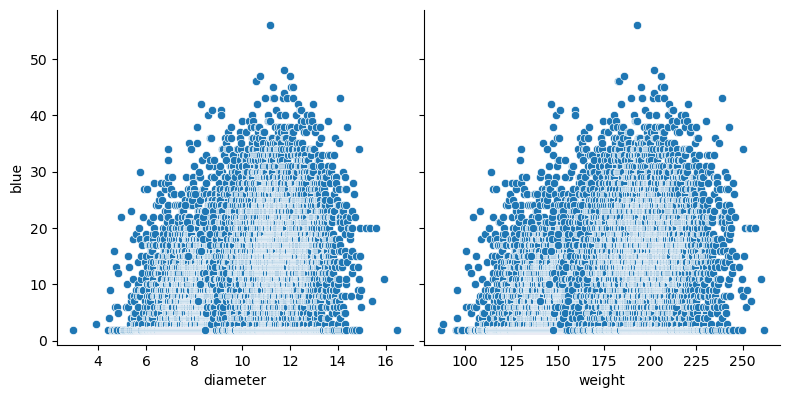

In [13]:
## Pairplot visualization graph for Feature Column Blue ##

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(citrus_ds, x_vars =['diameter', 'weight', ],
             y_vars = 'blue', size = 4, aspect = 1, kind ='scatter')
plt.show()

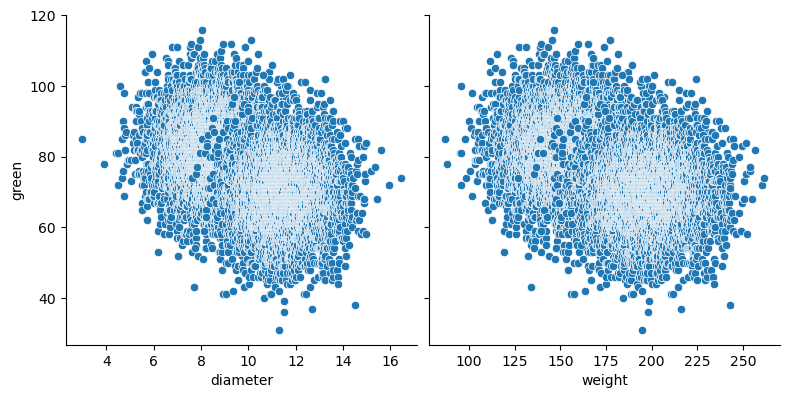

In [14]:
## Pairplot visualization graph for feature column Green ##

import matplotlib.pyplot as plt
import seaborn as sns

sns.pairplot(citrus_ds, x_vars =['diameter', 'weight', ],
             y_vars = 'green', size = 4, aspect = 1, kind ='scatter')
plt.show()

In [23]:
## Evaluation metrics ##

## Test Accuracy ##
acc_test = clf.score(X_test, y_test)
print(acc_test) 
y_test_pred = clf.predict(X_test)

## Confusion Matrix ##

cm = confusion_matrix(y_test, y_test_pred)
print(cm)

## Precision Rate ##
print("precision", cm[0][0]/(cm[0][0] + cm[1][0]))

#Recall Rate ##
print("recall", cm[0][0]/(cm[0][0] + cm[0][1]))


0.9625
[[938  50]
 [ 25 987]]
precision 0.9740394600207685
recall 0.9493927125506073


In [24]:
X_train
y_train

array([1., 1., 0., ..., 0., 1., 0.])

In [37]:
# KNN(X_train, y_train, X_test, k=7)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=10)

neigh.fit(X_train, y_train)
predictions = neigh.predict(X_test)
print(predictions)
# (y_test[:100] == predictions).sum()/len(predictions)
cm = confusion_matrix(y_test, predictions)
print(cm)

[1. 0. 0. ... 1. 0. 1.]
[[910  78]
 [ 92 920]]


In [38]:
acc_test = clf.score(X_test, y_test)
print(acc_test)
y_test_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, predictions)
print(cm)

print("precision", cm[0][0]/(cm[0][0] + cm[1][0]))

print("recall", cm[0][0]/(cm[0][0] + cm[0][1]))



0.9625
[[910  78]
 [ 92 920]]
precision 0.908183632734531
recall 0.9210526315789473


In [41]:
## Best values for KNN Algorithm ##
from sklearn.model_selection import cross_val_score


for k in [1,2,3,4,5,6,7,8,9,10]:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X_test, y_test, cv = 5, scoring = 'accuracy')
    scores = cross_val_score(knn, X_test, y_test, cv=5, scoring = 'precision_macro')
    #print(scores)
    print("k: %d. Precision: %0.2f (+/- %0.2f)" % (k, scores.mean(), scores.std()))


k: 1. Precision: 0.89 (+/- 0.01)
k: 2. Precision: 0.89 (+/- 0.01)
k: 3. Precision: 0.90 (+/- 0.01)
k: 4. Precision: 0.90 (+/- 0.01)
k: 5. Precision: 0.91 (+/- 0.01)
k: 6. Precision: 0.91 (+/- 0.01)
k: 7. Precision: 0.91 (+/- 0.01)
k: 8. Precision: 0.91 (+/- 0.01)
k: 9. Precision: 0.92 (+/- 0.01)
k: 10. Precision: 0.91 (+/- 0.01)


In [20]:
## Thank you for reading my code !##